# Análise Exploratória

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [2]:
df = pd.read_csv('../dados/dadosCompletos.csv', sep=';')

In [3]:
pd.set_option('display.max_columns',999)
pd.set_option("display.max_rows", 999)

In [4]:
df.sample(5)

,id_animal,estabelecimento_municipio,data_abate,estabelecimento_identificador,identificador_lote,tipificacao,maturidade,acabamento,peso,motivo_desclassificacao,q_classificacao_estabel,q_outros_incentiv,q_pratica_recuperacao_pa,q_fertiirrigacao,q_ilp,q_ilpf,q_ifp,q_fabrica_racao,q_identificacao_individual,q_regua_manejo,q_bpa,q_aliancas_mercadolog,q_qual_alianca,q_cobertura_vegetal_80_area,q_erosaoo_sulco_20_area,q_sisbov,q_lista_trace,data12m,data6m,data3m,data1m,data7d,tot7d_chuva,med7d_tempinst,med7d_tempmax,med7d_tempmin,med7d_umidinst,med7d_umidmax,med7d_umidmin,med7d_velventomax,med7d_formituinst,med7d_formitumax,med7d_num_pixels,med7d_ndvi,med7d_evi,med7d_prer_soja,med7d_prer_milho,med7d_prer_boi,tot1m_chuva,med1m_tempinst,med1m_tempmax,med1m_tempmin,med1m_umidinst,med1m_umidmax,med1m_umidmin,med1m_velventomax,med1m_formituinst,med1m_formitumax,med1m_num_pixels,med1m_ndvi,med1m_evi,med1m_prer_soja,med1m_prer_milho,med1m_prer_boi,tot3m_chuva,med3m_tempinst,med3m_tempmax,med3m_tempmin,med3m_umidinst,med3m_umidmax,med3m_umidmin,med3m_velventomax,med3m_formituinst,med3m_formitumax,med3m_num_pixels,med3m_ndvi,med3m_evi,med3m_prer_soja,med3m_prer_milho,med3m_prer_boi,tot6m_chuva,med6m_tempinst,med6m_tempmax,med6m_tempmin,med6m_umidinst,med6m_umidmax,med6m_umidmin,med6m_velventomax,med6m_formituinst,med6m_formitumax,med6m_num_pixels,med6m_ndvi,med6m_evi,med6m_prer_soja,med6m_prer_milho,med6m_prer_boi,tot12m_chuva,med12m_tempinst,med12m_tempmax,med12m_tempmin,med12m_umidinst,med12m_umidmax,med12m_umidmin,med12m_velventomax,med12m_formituinst,med12m_formitumax,med12m_num_pixels,med12m_ndvi,med12m_evi,med12m_prer_soja,med12m_prer_milho,med12m_prer_boi,cnt7d_cl_itumax,cnt7d_cl_ituinst,cnt1m_cl_itumax,cnt1m_cl_ituinst,cnt3m_cl_itumax,cnt3m_cl_ituinst,cnt6m_cl_itumax,cnt6m_cl_ituinst,cnt12m_cl_itumax,cnt12m_cl_ituinst,ano,categoria,classificacao
18146,18147,PARAISO DAS AGUAS,10MAY2017,1034,6276,macho castrado,Dois dentes,gordura mediana - acima de 3 a ata 6 mm de esp...,278.2,CLASSIFICADO,30.0,NÃO,SIM,NÃO,SIM,NÃO,NÃO,SIM,SIM,SIM,NÃO,SIM,ASPNP,SIM,NÃO,NÃO,NaN,09MAY2016,08NOV2016,06FEB2017,09APR2017,02MAY2017,NaN,22.61,29.00,17.31,69.14,89.33,40.56,16.16,69.90,82.36,NaN,NaN,NaN,69.08,28.19,137.96,NaN,22.29,28.44,17.67,73.50,91.16,46.47,16.31,69.68,81.62,NaN,NaN,NaN,67.29,28.20,137.93,8860.8,23.26,29.38,19.01,73.76,90.64,46.05,16.49,70.69,82.00,NaN,NaN,NaN,69.62,32.18,141.23,11863.8,23.11,29.03,19.10,75.41,91.15,48.73,16.50,68.64,78.74,NaN,NaN,NaN,71.37,33.25,143.17,11863.8,23.11,29.03,19.10,75.41,91.15,48.73,16.50,68.64,78.74,NaN,NaN,NaN,71.37,33.25,143.17,1.0,0.0,0.8750,0.0,0.9451,0.0000,0.9138,0.0000,0.9138,0.0000,2017,AA,1
513055,513056,SANTA RITA DO PARDO,10MAY2018,5137,47541,famea,Dente de leite,gordura escassa - 1 a 3 mm de espessura,174.0,DESCLASSIFICADO PELO PESO,26.0,NÃO,SIM,NÃO,NÃO,NÃO,SIM,NÃO,SIM,SIM,NÃO,SIM,ACNB,SIM,NÃO,SIM,SIM,09MAY2017,08NOV2017,06FEB2018,09APR2018,02MAY2018,0.0,25.67,32.27,20.17,55.13,81.67,28.67,19.08,72.90,86.52,41689.0,0.50,0.27,86.24,41.07,141.73,0.0,25.61,31.74,20.76,58.50,80.88,34.16,18.88,73.21,85.55,41689.0,0.54,0.30,86.29,40.11,142.48,19514.4,25.84,31.78,21.48,68.01,90.72,42.60,17.80,74.56,87.29,41689.0,0.61,0.38,81.20,39.39,144.00,93088.2,25.78,31.62,21.58,70.37,92.22,44.20,18.57,74.69,87.25,41689.0,0.62,0.40,77.31,35.96,144.32,174135.0,24.48,30.61,19.83,65.27,87.54,40.17,20.06,72.16,84.60,41689.0,0.56,0.35,73.84,31.98,139.34,1.0,0.0,1.0000,0.0,0.9787,0.1170,0.9837,0.0870,0.8828,0.0490,2018,D,0
381711,381712,RIBAS DO RIO PARDO,02FEB2018,5061,33443,famea,Dois dentes,gordura mediana - acima de 3 a ata 6 mm de esp...,226.5,CLASSIFICADO,21.0,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,SIM,NÃO,NÃO,NaN,SIM,NÃO,NÃO,NaN,01FEB2017,03AUG2017,01NOV2017,02JAN2018,25JAN2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.30,46.30,106541.0,0.60,0.41,71.61,32.71,145.54,NaN,NaN,NaN,NaN,85.43,98.64,55.36,14.27,40.84,40.00,106541.0,0.62,0.42,71.81,32.73,146.42,NaN,NaN,NaN,NaN,84.68,98.60,54.53,14.26,44.33,44.00,106541.0,0.60,0.40,73.20,

## 1. Dimensões do data frame e tipos de dados

In [5]:
print('A base de dados apresenta {} registros e {} características.'.format(df.shape[0], df.shape[1]))

A base de dados apresenta 1061451 registros e 125 características.


In [5]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061451 entries, 0 to 1061450
Data columns (total 125 columns):
 #    Column                         Dtype  
---   ------                         -----  
 0    id_animal                      int64  
 1    estabelecimento_municipio      object 
 2    data_abate                     object 
 3    estabelecimento_identificador  int64  
 4    identificador_lote             int64  
 5    tipificacao                    object 
 6    maturidade                     object 
 7    acabamento                     object 
 8    peso                           float64
 9    motivo_desclassificacao        object 
 10   q_classificacao_estabel        float64
 11   q_outros_incentiv              object 
 12   q_pratica_recuperacao_pa       object 
 13   q_fertiirrigacao               object 
 14   q_ilp                          object 
 15   q_ilpf                         object 
 16   q_ifp                          object 
 17   q_fabrica_racao          

<p>Resultado do dtypes: float64(92), int64(5), object(28). 97 Características numéricas e 28 categóricas.</p>

In [ ]:
1107689

### Características identificadores

<p style="color:#eb4c47">id_animal, estabelecimento_identificador e identificador_lote, desta forma podem ser retiradas.</p>

### Característica classificadora

In [10]:
categorias = df.categoria.value_counts()
categorias

AA     366328
AAA    224326
BB     174592
D      173758
BBB     80960
C       41487
Name: categoria, dtype: int64

<figure>
    <figcaption style='text-align:center'><h4>Quadro classificação novilho precoce</h3></figcaption>
  <img src="quadro_classificacao.png" alt="Quadro classificação novilho precoce">  
</figure>


<p>Há poucos registros das categorias caracteríscas classificadoras C e BB. A categoria D, a qual desclassifica a carcaça, esta em maior quantidade se comparada com as categoias C e B.</p>

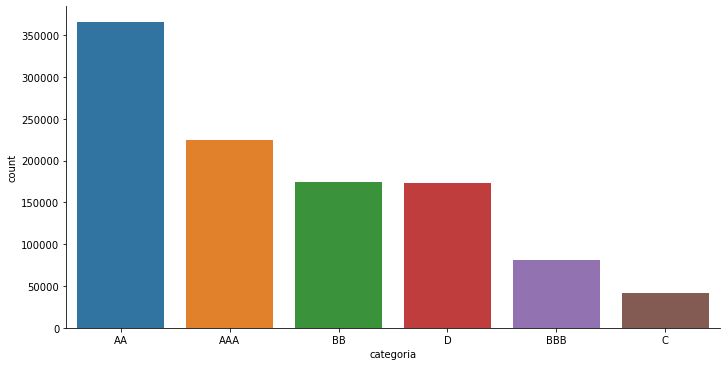

In [11]:
sns.catplot(x = "categoria", data = df, 
            kind="count", 
            aspect=2,
            order = categorias.index)

## 2.  Visualizando principais valores estatísticos

In [1]:
df.describe().T

NameError: name 'df' is not defined

In [69]:
#df.describe().T.to_csv("describe_dados.csv")

### 2.1 Possíveis outliers

#### Dados de precipitações

In [51]:
def plotarBoxplot (titulo,x, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    box_plot = sns.boxplot(x= x, data = dataset, orient = 'h')
    box_plot.figure.set_size_inches(18,8)
    box_plot.set_title(titulo, fontsize = 20)
    box_plot

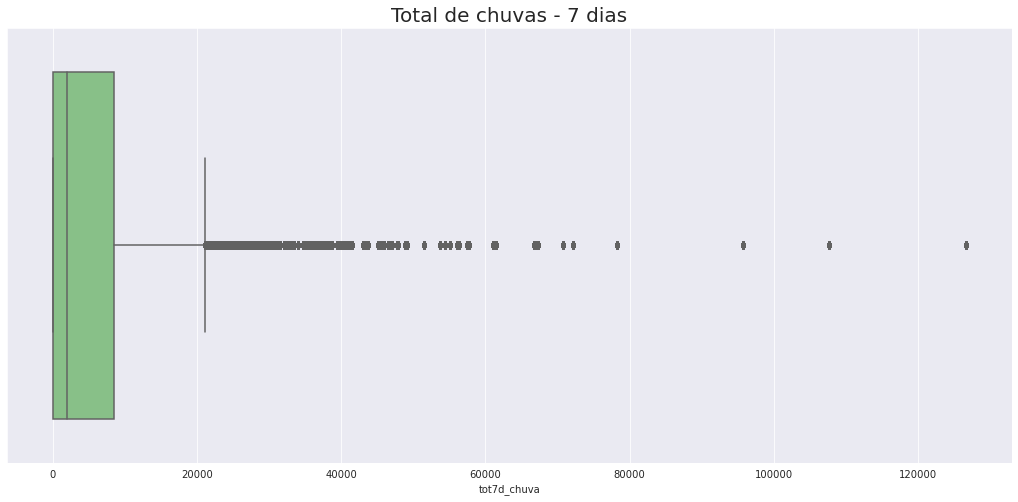

In [52]:
plotarBoxplot ('Total de chuvas - 7 dias', 'tot7d_chuva', df )

<p>Quantidade de registros a acima do valor máximo:</p> 

In [2]:
len(df.query('tot7d_chuva > 21082'))

NameError: name 'df' is not defined

In [5]:
len(df.query('tot7d_chuva > 126670'))

880

<p>Todos registro com valor maior que 126670 correspondem a mesma data de abate:</p>

In [18]:
#Seleção dos dados considerados outliers
df_outlier_preceptacao =  df.query('tot7d_chuva > 126670')

In [27]:
df_outlier_preceptacao.data_abate.value_counts()

10OCT2018    880
Name: data_abate, dtype: int64

In [32]:
df_chuva = pd.DataFrame(data = df, columns = ['tot7d_chuva','tot1m_chuva','tot3m_chuva', 'tot6m_chuva', 'tot12m_chuva'])

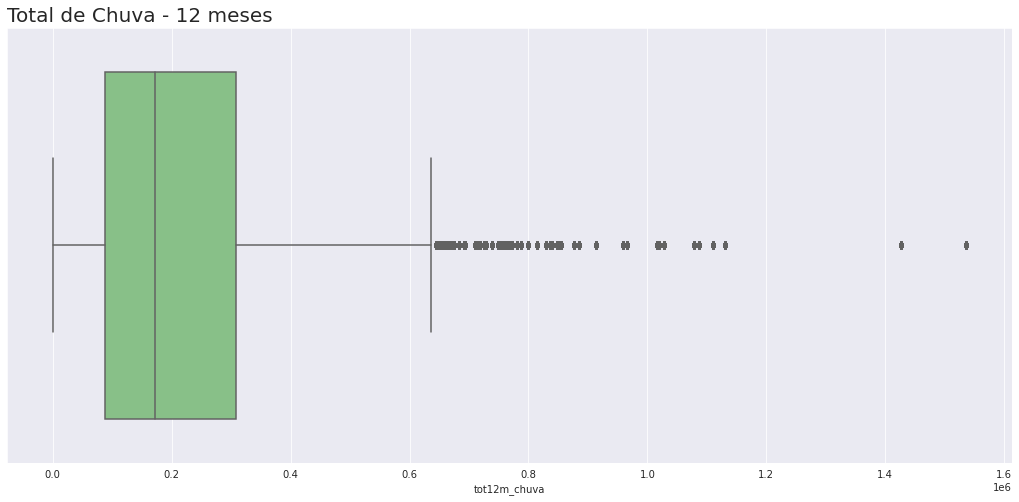

In [30]:
plotarBoxplot('Total de Chuva - 12 meses','tot12m_chuva', df)

In [49]:
def plotarBoxplotDf (titulo, xlabel, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    box_plot = sns.boxplot(x="variable", y="value", data=pd.melt(dataset))
    box_plot.set_xlabel(xlabel, fontsize=14)
    box_plot.figure.set_size_inches(20,15)
    box_plot.set_title(titulo, fontsize = 20)
    box_plot    

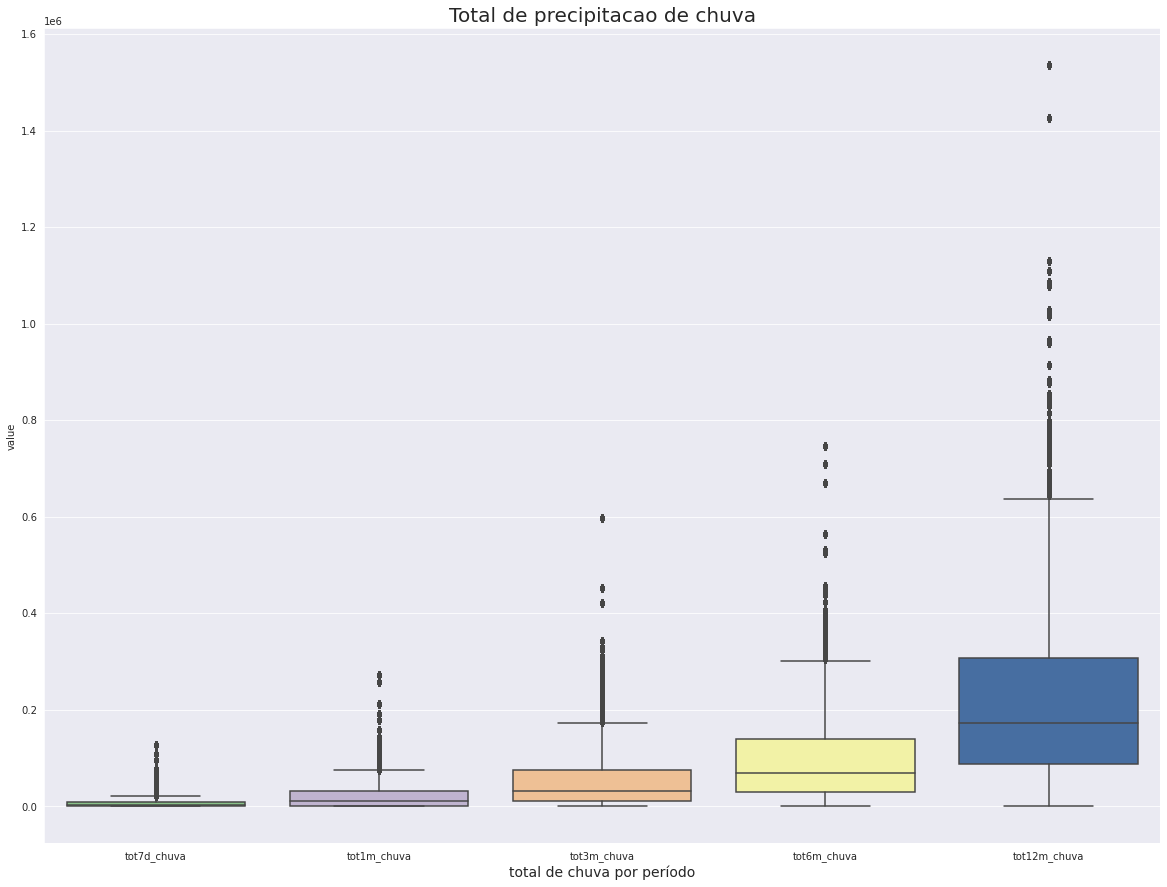

In [50]:
plotarBoxplotDf ('Total de precipitacao de chuva','total de chuva por período', df_chuva )

#### Dados do múmero de pixels

#### Valores repetidos

<p>As características med7d_num_pixels, med1m_num_pixels, med3m_num_pixels, med6m_num_pixels e med12m_num_pixels possuem os mesmo valores.</p>

In [6]:
df_num_pixels = pd.DataFrame(data = df, columns = ['med7d_num_pixels','med1m_num_pixels','med3m_num_pixels', 'med6m_num_pixels', 'med12m_num_pixels'])

<AxesSubplot:title={'center':'Número de Pixels'}, xlabel='variable', ylabel='value'>

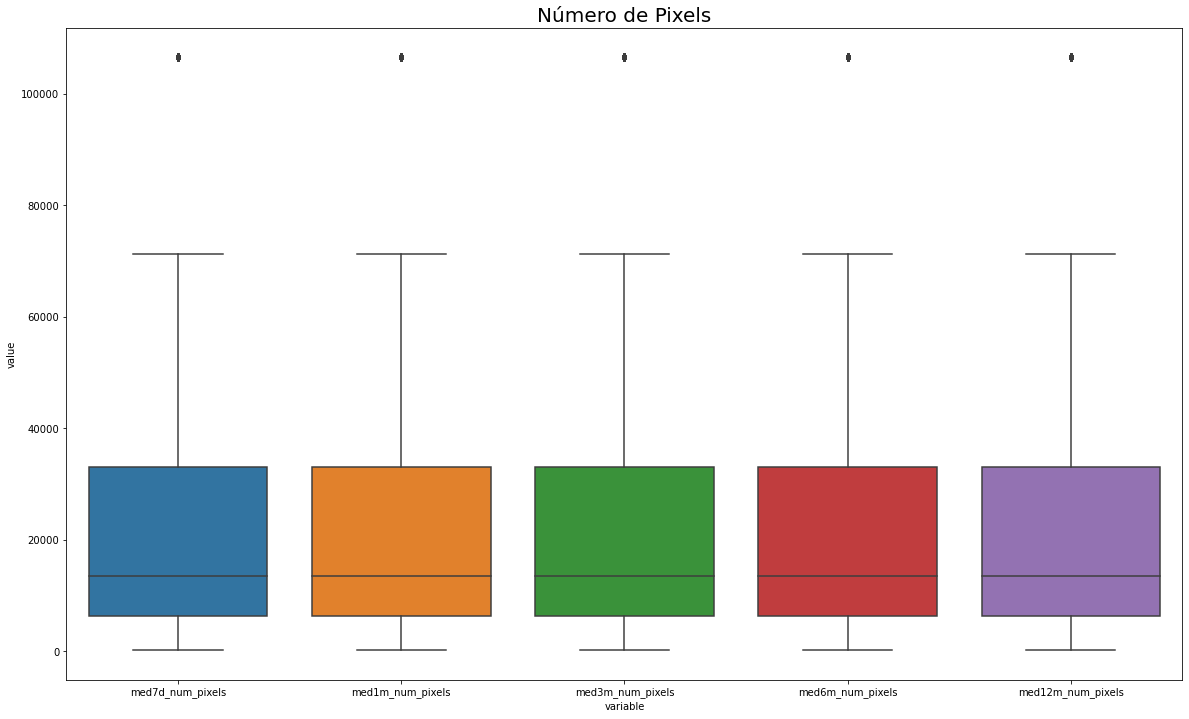

In [8]:
box_plot = sns.boxplot(x="variable", y="value", data=pd.melt(df_num_pixels))
box_plot.figure.set_size_inches(20,12)
box_plot.set_title('Número de Pixels', fontsize = 20)
box_plot

In [10]:
len(df.query('med7d_num_pixels > 100000'))

88596

#### Dados Classificação ITU

In [11]:
df_itu = pd.DataFrame(data = df, columns = ['cnt7d_cl_ituinst','cnt1m_cl_ituinst','cnt3m_cl_ituinst', 'cnt6m_cl_ituinst', 'cnt12m_cl_ituinst'])

<AxesSubplot:title={'center':'Classificação ITU'}, xlabel='variable', ylabel='value'>

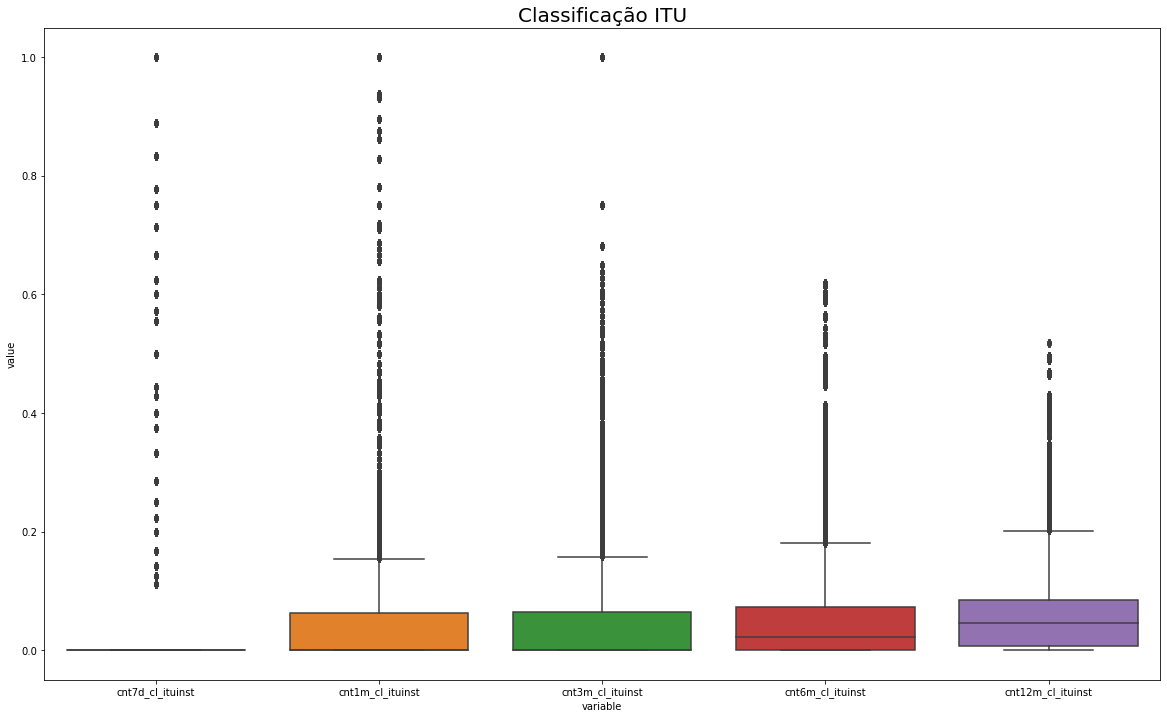

In [13]:
box_plot = sns.boxplot(x="variable", y="value", data=pd.melt(df_itu))
box_plot.figure.set_size_inches(20,12)
box_plot.set_title('Classificação ITU', fontsize = 20)
box_plot

#### Dados EVI

In [16]:
df_evi = pd.DataFrame(data = df, columns = ['med7d_evi','med1m_evi','med3m_evi', 'med6m_evi', 'med12m_evi'])

<AxesSubplot:title={'center':'EVI'}, xlabel='variable', ylabel='value'>

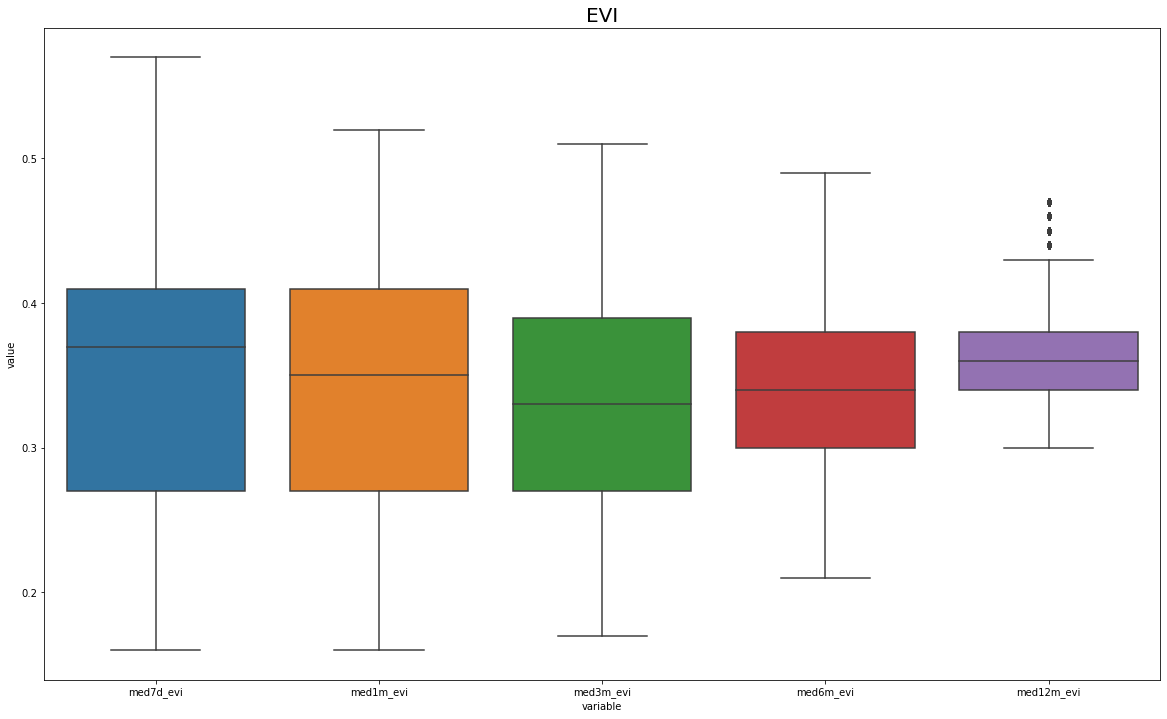

In [17]:
box_plot = sns.boxplot(x="variable", y="value", data=pd.melt(df_evi))
box_plot.figure.set_size_inches(20,12)
box_plot.set_title('EVI', fontsize = 20)
box_plot

#### NDVI

In [19]:
df_ndvi = pd.DataFrame(data = df, columns = ['med7d_ndvi','med1m_ndvi','med3m_ndvi', 'med6m_ndvi', 'med12m_ndvi'])

<AxesSubplot:title={'center':'NDVI'}, xlabel='variable', ylabel='value'>

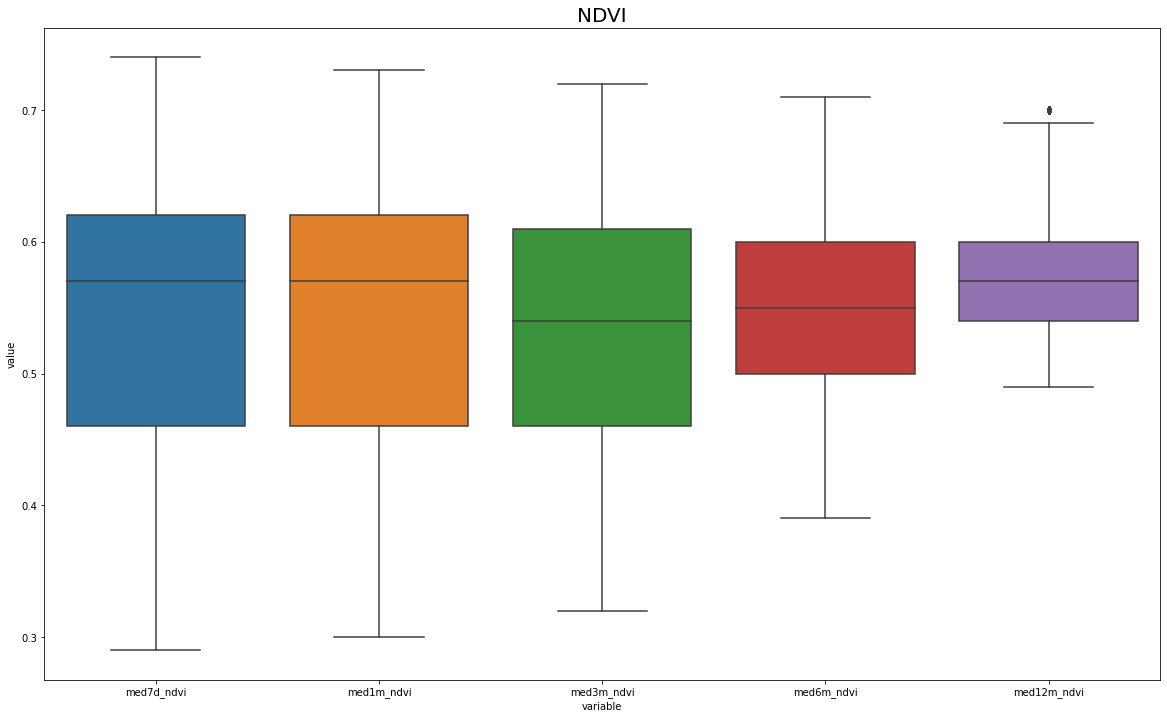

In [20]:
box_plot = sns.boxplot(x="variable", y="value", data=pd.melt(df_ndvi))
box_plot.figure.set_size_inches(20,12)
box_plot.set_title('NDVI', fontsize = 20)
box_plot

#### Velocidade do Vento

In [25]:
df_velventomax = pd.DataFrame(data = df, columns = ['med7d_velventomax','med1m_velventomax','med3m_velventomax', 'med6m_velventomax', 'med12m_velventomax'])

<AxesSubplot:title={'center':'Velocidade do vento'}, xlabel='variable', ylabel='value'>

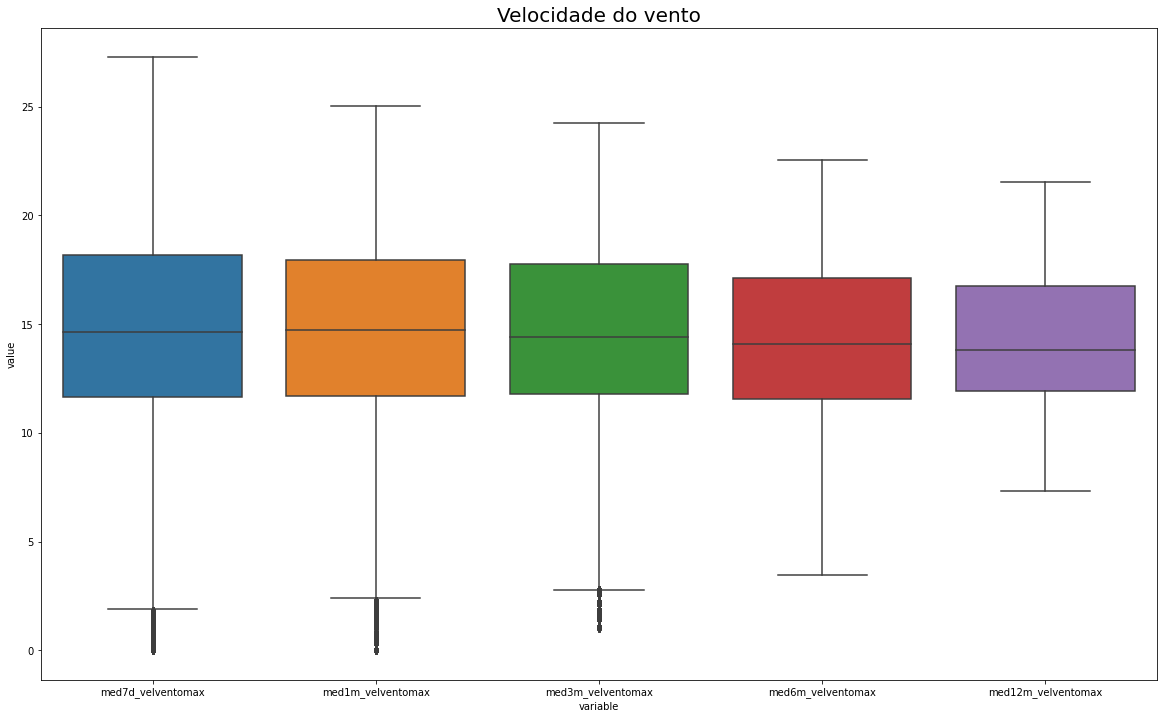

In [26]:
box_plot = sns.boxplot(x="variable", y="value", data=pd.melt(df_velventomax))
box_plot.figure.set_size_inches(20,12)
box_plot.set_title('Velocidade do vento', fontsize = 20)
box_plot

#### Temperatura Mínima

In [28]:
df_tempmin = pd.DataFrame(data = df, columns = ['med7d_tempmin','med1m_tempmin','med3m_tempmin', 'med6m_tempmin', 'med12m_tempmin'])

<AxesSubplot:title={'center':'Temperatura mínima'}, xlabel='variable', ylabel='value'>

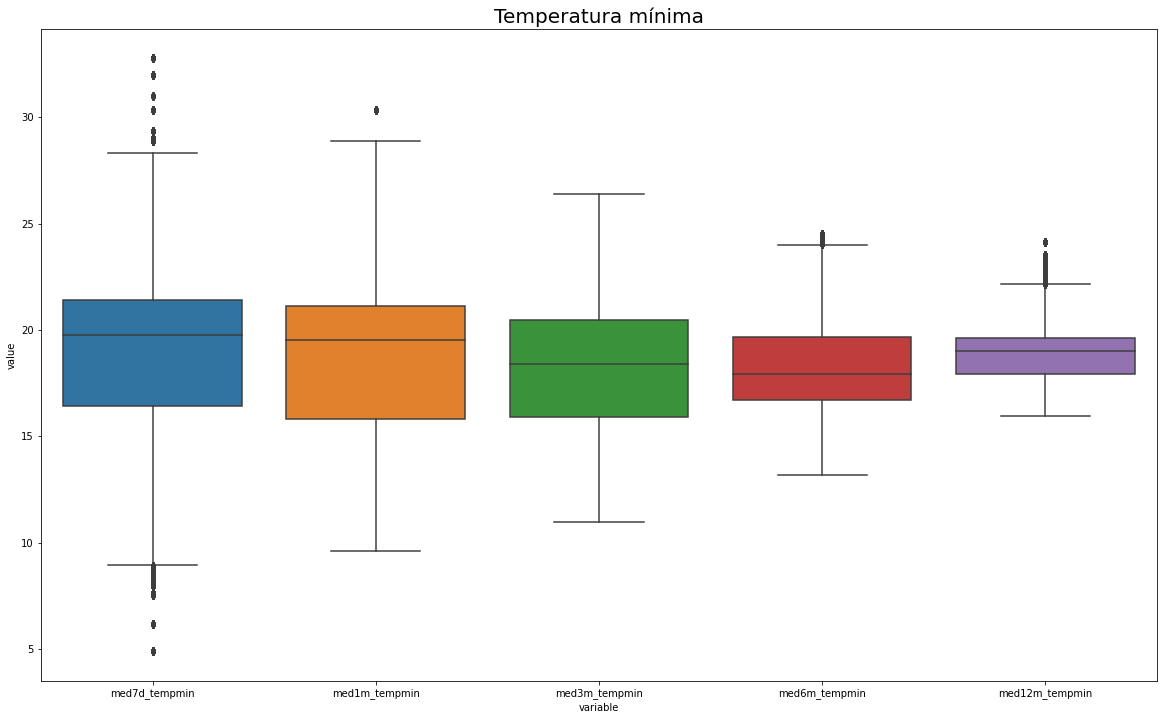

In [29]:
box_plot = sns.boxplot(x="variable", y="value", data=pd.melt(df_tempmin))
box_plot.figure.set_size_inches(20,12)
box_plot.set_title('Temperatura mínima', fontsize = 20)
box_plot

#### Umidade instantânea

In [31]:
df_umidinst = pd.DataFrame(data = df, columns = ['med7d_umidinst','med1m_umidinst','med3m_umidinst', 'med6m_umidinst', 'med12m_umidinst'])

<AxesSubplot:title={'center':'Umidade instantâne'}, xlabel='variable', ylabel='value'>

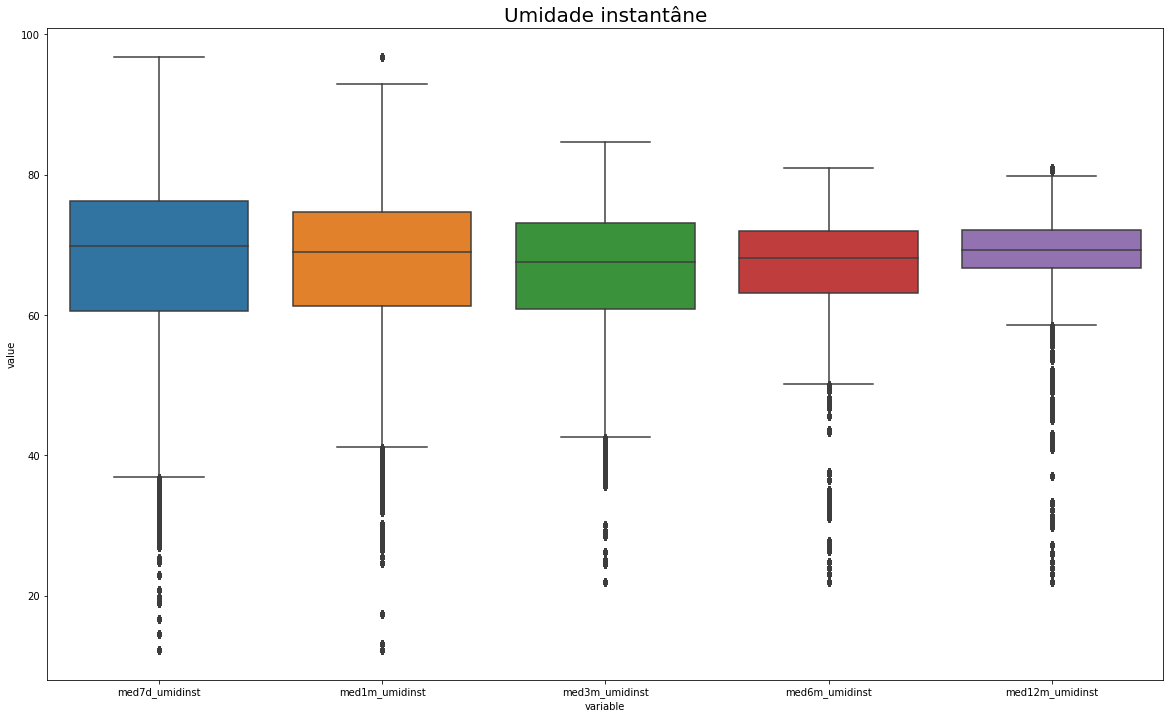

In [32]:
box_plot = sns.boxplot(x="variable", y="value", data=pd.melt(df_umidinst))
box_plot.figure.set_size_inches(20,12)
box_plot.set_title('Umidade instantâne', fontsize = 20)
box_plot

#### Preço do milho

In [33]:
df_pre_milho = pd.DataFrame(data = df, columns = ['med7d_prer_milho','med1m_prer_milho','med3m_prer_milho', 'med6m_prer_milho', 'med12m_prer_milho'])

<AxesSubplot:title={'center':'Preço do Milho'}, xlabel='variable', ylabel='value'>

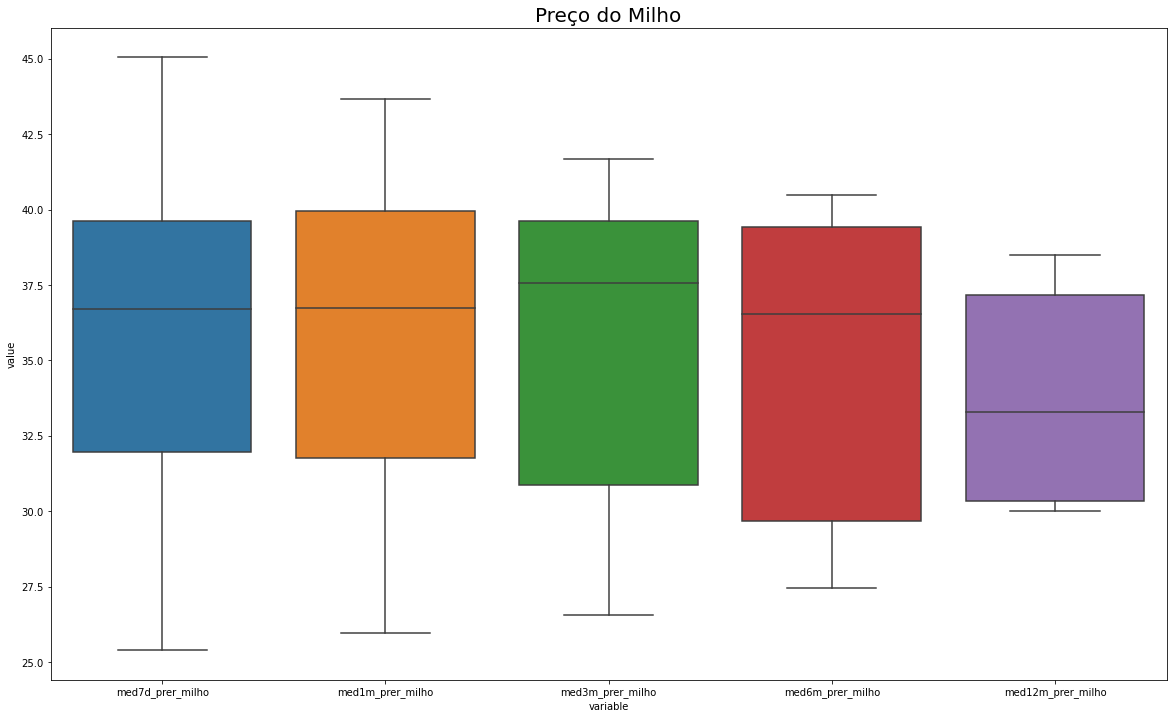

In [34]:
box_plot = sns.boxplot(x="variable", y="value", data=pd.melt(df_pre_milho))
box_plot.figure.set_size_inches(20,12)
box_plot.set_title('Preço do Milho', fontsize = 20)
box_plot

#### Preço da Soja

In [35]:
df_pre_soja = pd.DataFrame(data = df, columns = ['med7d_prer_soja','med1m_prer_soja','med3m_prer_soja', 'med6m_prer_soja', 'med12m_prer_soja'])

<AxesSubplot:title={'center':'Preço da Soja'}, xlabel='variable', ylabel='value'>

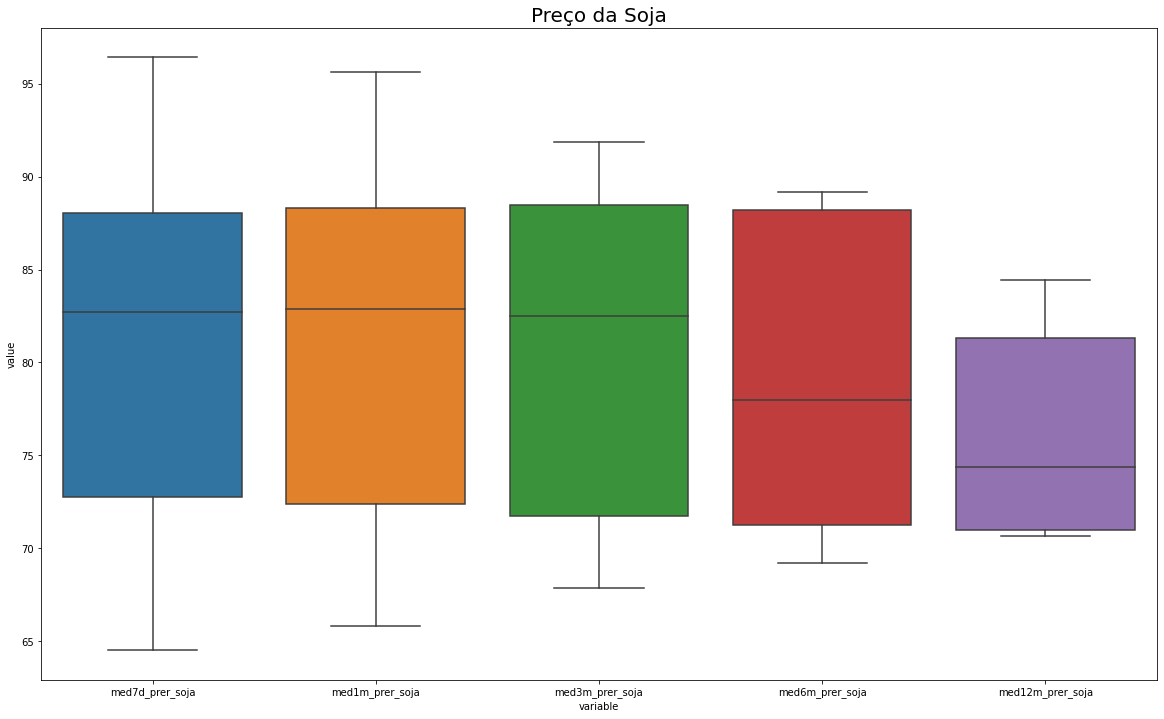

In [36]:
box_plot = sns.boxplot(x="variable", y="value", data=pd.melt(df_pre_soja))
box_plot.figure.set_size_inches(20,12)
box_plot.set_title('Preço da Soja', fontsize = 20)
box_plot

#### Preço do Boi

In [37]:
df_pre_boi = pd.DataFrame(data = df, columns = ['med7d_prer_boi','med1m_prer_boi','med3m_prer_boi', 'med6m_prer_boi', 'med12m_prer_boi'])

<AxesSubplot:title={'center':'Preço da Arroba do Boi'}, xlabel='variable', ylabel='value'>

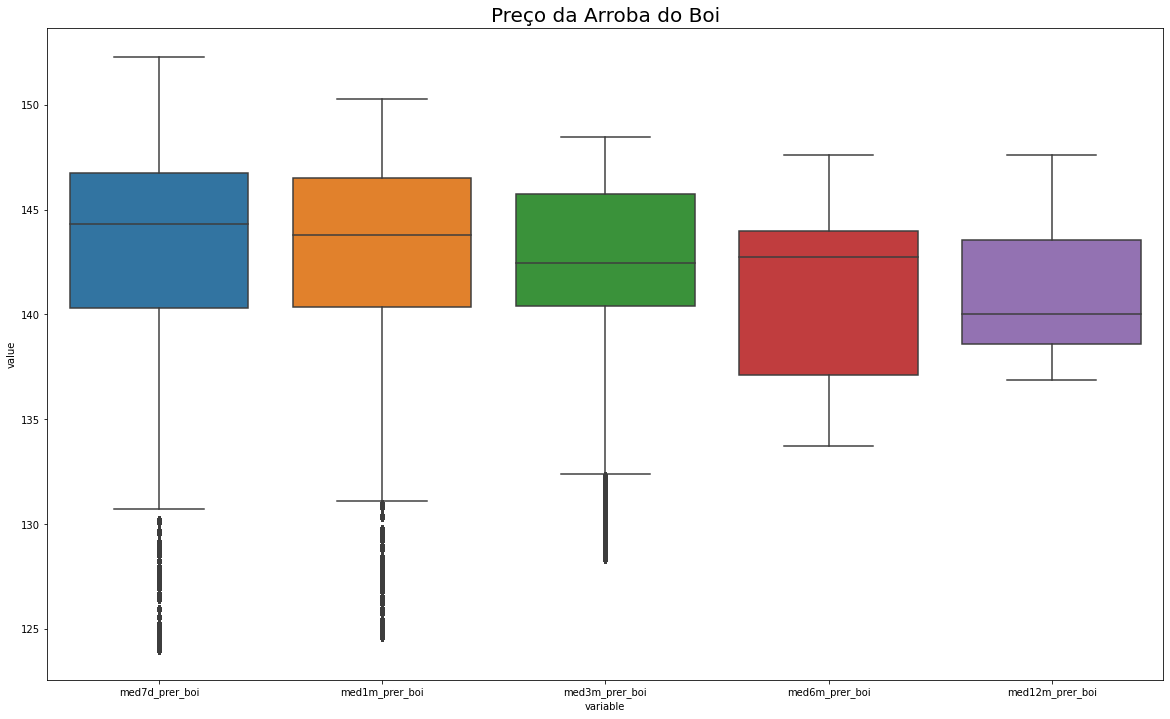

In [38]:
box_plot = sns.boxplot(x="variable", y="value", data=pd.melt(df_pre_boi))
box_plot.figure.set_size_inches(20,12)
box_plot.set_title('Preço da Arroba do Boi', fontsize = 20)
box_plot

In [29]:
selecao = df.query('med7d_prer_boi < 130')

In [33]:
selecao.peso.describe().T

count    51800.000000
mean       259.031550
std         47.478757
min        129.500000
25%        218.400000
50%        261.600000
75%        292.800000
max        559.400000
Name: peso, dtype: float64

#### Dados de Peso

<AxesSubplot:title={'center':'Peso da carcaça'}, xlabel='peso'>

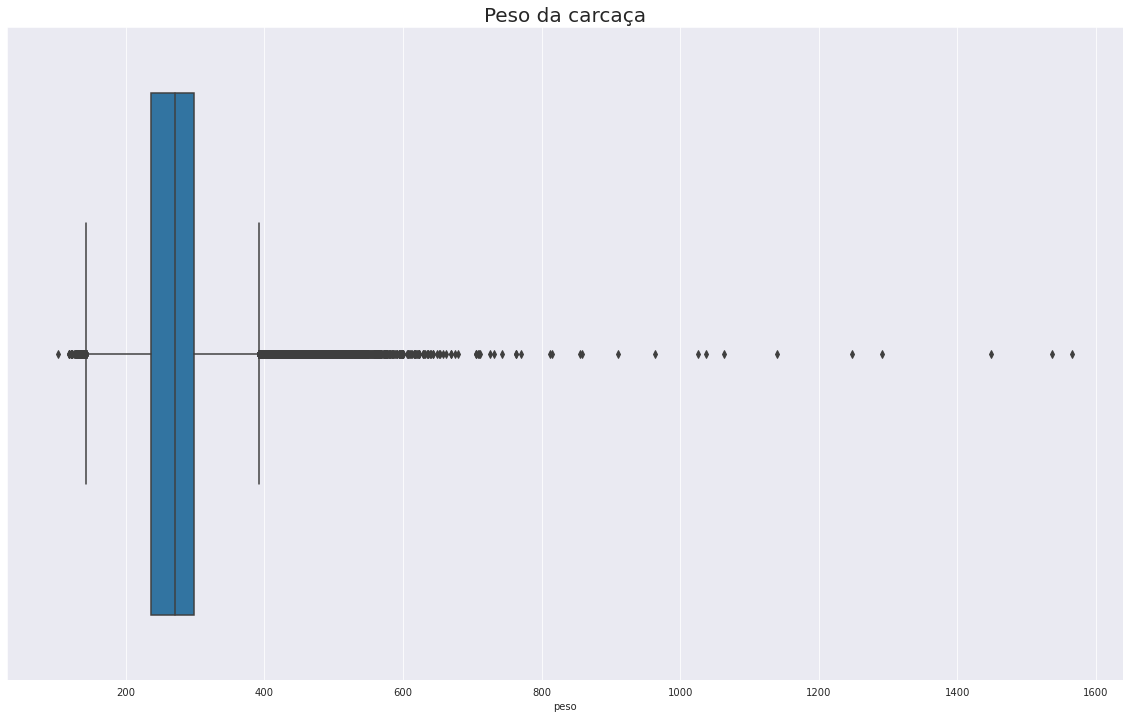

In [49]:
sns.set_style('darkgrid')
box_plot = sns.boxplot(x='peso', data = df, orient = 'h')
box_plot.figure.set_size_inches(20,12)
box_plot.set_title('Peso da carcaça', fontsize = 20)
box_plot

## 3. Dados ausentes

<p>Calcular a porcentagem de valores ausentes.</p>

In [71]:
round(df.isnull().mean() * 100,2).sort_values(ascending=False)

q_qual_alianca                   67.58
q_lista_trace                    53.84
q_cobertura_vegetal_80_area      21.81
q_erosaoo_sulco_20_area          21.81
tot7d_chuva                      11.84
tot1m_chuva                       4.83
q_sisbov                          4.64
q_identificacao_individual        4.64
q_classificacao_estabel           4.64
q_outros_incentiv                 4.64
q_pratica_recuperacao_pa          4.64
q_aliancas_mercadolog             4.64
q_bpa                             4.64
q_regua_manejo                    4.64
q_fabrica_racao                   4.64
cnt7d_cl_itumax                   4.39
med7d_tempmin                     4.38
med7d_tempmax                     4.38
cnt7d_cl_ituinst                  4.38
med7d_tempinst                    4.27
med7d_umidmin                     4.26
med7d_umidinst                    4.17
med12m_ndvi                       4.16
med7d_umidmax                     4.16
med12m_num_pixels                 4.16
med3m_num_pixels         

<p>Calcular a quantidade de valores ausentes.</p>

In [58]:
df.isnull().sum().sort_values(ascending=False)

q_qual_alianca                   717338
q_lista_trace                    571523
q_erosaoo_sulco_20_area          231491
q_cobertura_vegetal_80_area      231491
tot7d_chuva                      125666
tot1m_chuva                       51263
q_sisbov                          49296
q_aliancas_mercadolog             49296
q_bpa                             49296
q_classificacao_estabel           49296
q_outros_incentiv                 49296
q_pratica_recuperacao_pa          49296
q_regua_manejo                    49296
q_identificacao_individual        49296
q_fabrica_racao                   49296
cnt7d_cl_itumax                   46570
cnt7d_cl_ituinst                  46519
med7d_tempmin                     46441
med7d_tempmax                     46441
med7d_tempinst                    45274
med7d_umidmin                     45223
med7d_umidinst                    44285
med12m_ndvi                       44204
med12m_num_pixels                 44204
med3m_num_pixels                  44204


### 3.1 Dados faltantes q_qual_alianca 

<p>Este valor esta relacionado a característica participa de aliancas mercadolog (Sim ou Não). Temos 717.338 registros nulos para <b>q_qual_aliança</b>, sendo que 668.042 destes corresponde a <b>q_aliancas_mercadolog</b> com valor "Não". </p>

In [52]:
#Criando um dataframe onde a coluna q_qual_alianca possui valores nulos.
dados_faltantes = df[pd.isnull(df.q_qual_alianca)]

In [63]:
#Verificando que há somente o valor 'Não' para q_aliancas_mercadolog
dados_faltantes.q_aliancas_mercadolog.value_counts()

NÃO    668042
Name: q_aliancas_mercadolog, dtype: int64

### Dados faltantes med3m_umidinst

In [64]:
#Criando um dataframe onde a coluna med3m_umidinst possui valores nulos.
dados_faltantes = df[pd.isnull(df.med3m_umidinst)]

In [67]:
dados_faltantes.shape

(180, 125)

In [68]:
dados_faltantes.groupby("categoria").count()

,id_animal,estabelecimento_municipio,data_abate,estabelecimento_identificador,identificador_lote,tipificacao,maturidade,acabamento,peso,motivo_desclassificacao,q_classificacao_estabel,q_outros_incentiv,q_pratica_recuperacao_pa,q_fertiirrigacao,q_ilp,q_ilpf,q_ifp,q_fabrica_racao,q_identificacao_individual,q_regua_manejo,q_bpa,q_aliancas_mercadolog,q_qual_alianca,q_cobertura_vegetal_80_area,q_erosaoo_sulco_20_area,q_sisbov,q_lista_trace,data12m,data6m,data3m,data1m,data7d,tot7d_chuva,med7d_tempinst,med7d_tempmax,med7d_tempmin,med7d_umidinst,med7d_umidmax,med7d_umidmin,med7d_velventomax,med7d_formituinst,med7d_formitumax,med7d_num_pixels,med7d_ndvi,med7d_evi,med7d_prer_soja,med7d_prer_milho,med7d_prer_boi,tot1m_chuva,med1m_tempinst,med1m_tempmax,med1m_tempmin,med1m_umidinst,med1m_umidmax,med1m_umidmin,med1m_velventomax,med1m_formituinst,med1m_formitumax,med1m_num_pixels,med1m_ndvi,med1m_evi,med1m_prer_soja,med1m_prer_milho,med1m_prer_boi,tot3m_chuva,med3m_tempinst,med3m_tempmax,med3m_tempmin,med3m_umidinst,med3m_umidmax,med3m_umidmin,med3m_velventomax,med3m_formituinst,med3m_formitumax,med3m_num_pixels,med3m_ndvi,med3m_evi,med3m_prer_soja,med3m_prer_milho,med3m_prer_boi,tot6m_chuva,med6m_tempinst,med6m_tempmax,med6m_tempmin,med6m_umidinst,med6m_umidmax,med6m_umidmin,med6m_velventomax,med6m_formituinst,med6m_formitumax,med6m_num_pixels,med6m_ndvi,med6m_evi,med6m_prer_soja,med6m_prer_milho,med6m_prer_boi,tot12m_chuva,med12m_tempinst,med12m_tempmax,med12m_tempmin,med12m_umidinst,med12m_umidmax,med12m_umidmin,med12m_velventomax,med12m_formituinst,med12m_formitumax,med12m_num_pixels,med12m_ndvi,med12m_evi,med12m_prer_soja,med12m_prer_milho,med12m_prer_boi,cnt7d_cl_itumax,cnt7d_cl_ituinst,cnt1m_cl_itumax,cnt1m_cl_ituinst,cnt3m_cl_itumax,cnt3m_cl_ituinst,cnt6m_cl_itumax,cnt6m_cl_ituinst,cnt12m_cl_itumax,cnt12m_cl_ituinst,ano,classificacao
categoria,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AA,77,77,77,77,77,77,77,77,77,77,14,14,14,77,77,77,77,14,14,14,14,14,0,14,14,14,0,77,77,77,77,77,0,0,0,0,0,0,0,0,77,77,0,0,0,77,77,77,0,0,0,0,0,0,0,0,77,77,0,0,0,77,77,77,0,0,0,0,0,0,0,0,77,77,0,0,0,77,77,77,77,77,77,77,77,77,77,77,77,77,0,0,0,77,77,77,77,77,77,77,77,77,77,77,77,77,0,0,0,77,77,77,0,0,0,0,0,0,77,77,77,77,77,77
AAA,92,92,92,92,92,92,92,92,92,92,4,4,4,92,92,92,92,4,4,4,4,4,0,4,4,4,0,92,92,92,92,92,0,0,0,0,0,0,0,0,92,92,0,0,0,92,92,92,0,0,0,0,0,0,0,0,92,92,0,0,0,92,92,92,0,0,0,0,0,0,0,0,92,92,0,0,0,92,92,92,92,92,92,92,92,92,92,92,92,92,0,0,0,92,92,92,92,92,92,92,92,92,92,92,92,92,0,0,0,92,92,92,0,0,0,0,0,0,92,92,92,92,92,92
BB,6,6,6,6,6,6,6,6,6,6,1,1,1,6,6,6,6,1,1,1,1,1,0,1,1,1,0,6,6,6,6,6,0,0,0,0,0,0,0,0,6,6,0,0,0,6,6,6,0,0,0,0,0,0,0,0,6,6,0,0,0,6,6,6,0,0,0,0,0,0,0,0,6,6,0,0,0,6,6,6,6,6,6,6,6,6,6,6,6,6,0,0,0,6,6,6,6,6,6,6,6,6,6,6,6,6,0,0,0,6,6,6,0,0,0,0,0,0,6,6,6,6,6,6
BBB,2,2,2,2,2,2,2,2,2,2,0,0,0,2,2,2,2,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,0,0,0,0,0,0,0,0,2,2,0,0,0,2,2,2,0,0,0,0,0,0,0,0,2,2,0,0,0,2,2,2,0,0,0,0,0,0,0,0,2,2,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,0,0,0,2,2,2,0,0,0,0,0,0,2,2,2,2,2,2
D,3,3,3,3,3,3,3,3,3,3,1,1,1,3,3,3,3,1,1,1,1,1,0,1,1,1,0,3,3,3,3,3,0,0,0,0,0,0,0,0,3,3,0,0,0,3,3,3,0,0,0,0,0,0,0,0,3,3,0,0,0,3,3,3,0,0,0,0,0,0,0,0,3,3,0,0,0,3,3,3,3,3,3,3,3,3,3,3,3,3,0,0,0,3,3,3,3,3,3,3,3,3,3,3,3,3,0,0,0,3,3,3,0,0,0,0,0,0,3,3,3,3,3,3


## 4. Matriz de correlação

<p>Plotar o gráfico com os registros referente a média de 7 dias</p> 

In [168]:
col_sete_d = ['estabelecimento_municipio', 'data_abate',
       'tipificacao', 'maturidade', 'acabamento', 'peso',
       'motivo_desclassificacao', 'q_classificacao_estabel',
       'q_outros_incentiv', 'q_pratica_recuperacao_pa',
       'q_fertiirrigacao', 'q_ilp', 'q_ilpf', 'q_ifp', 'q_fabrica_racao',
       'q_identificacao_individual', 'q_regua_manejo', 'q_bpa',
       'q_aliancas_mercadolog', 'q_qual_alianca',
       'q_cobertura_vegetal_80_area', 'q_erosaoo_sulco_20_area',
       'q_sisbov', 'q_lista_trace', 'data12m', 'data6m', 'data3m',
       'data1m', 'data7d', 'tot7d_chuva', 'med7d_tempinst',
       'med7d_tempmax', 'med7d_tempmin', 'med7d_umidinst',
       'med7d_umidmax', 'med7d_umidmin', 'med7d_velventomax',
       'med7d_formituinst', 'med7d_formitumax', 'med7d_num_pixels',
       'med7d_ndvi', 'med7d_evi', 'med7d_prer_soja', 'med7d_prer_milho',
       'med7d_prer_boi', 'cnt7d_cl_itumax', 'cnt7d_cl_ituinst', 'ano', 'categoria', 'classificacao']

In [169]:
df_resumido = pd.read_csv('../dados/dadosCompletos.csv', encoding='ISO-8859-1', sep=';', usecols=col_sete_d)

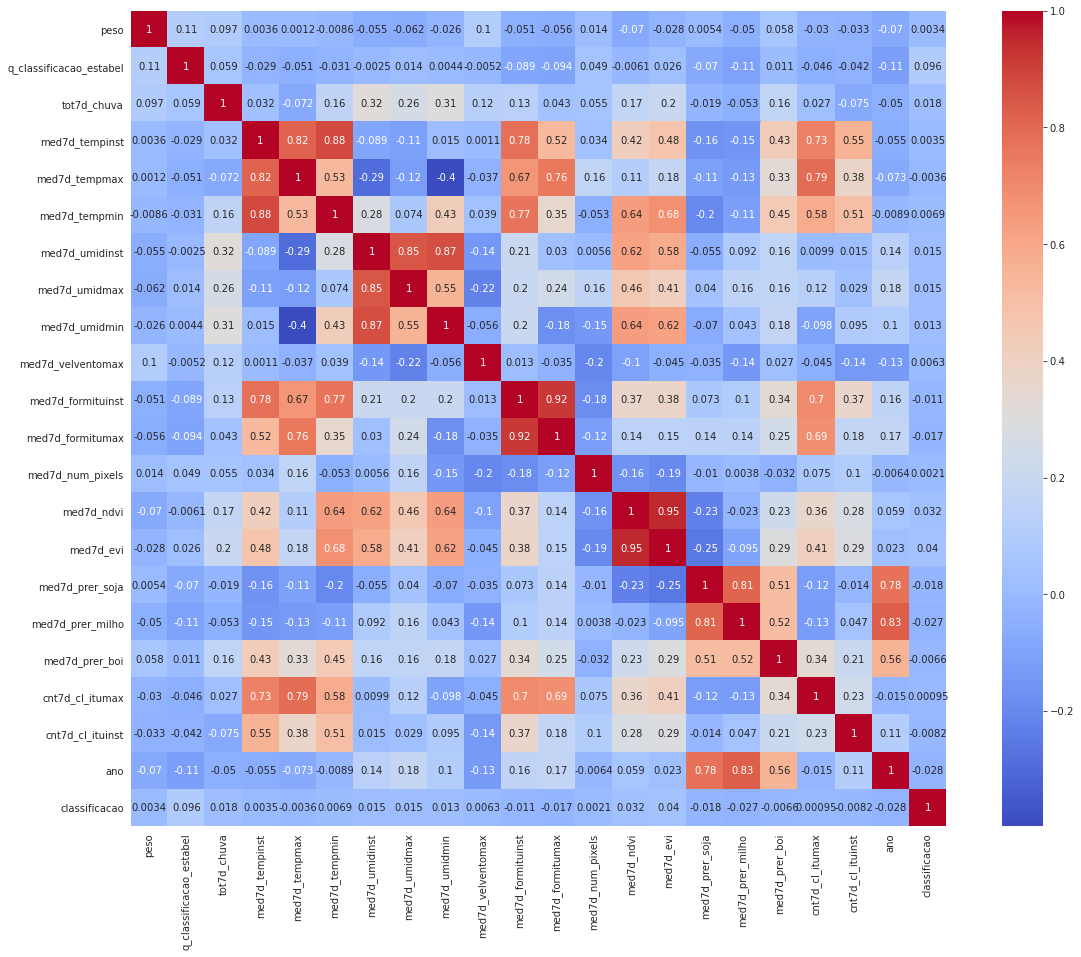

In [188]:
plt.figure(figsize=(20,15)) 
sns_plot = sns.heatmap(data=df_resumido.corr(),annot=True,cmap='coolwarm', square=True);
fig = sns_plot.get_figure()
fig.savefig("Matriz_Corr_resumido.png")